In [1]:
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
import matplotlib.pyplot as plt


Using TensorFlow backend.


(300, 2) (300,)
[[-0.17144193  0.58124638]
 [ 2.00610181  0.67177543]
 [ 2.00587048 -0.24541068]
 [ 0.28496886  0.87030829]
 [ 1.45759817 -0.80514066]
 [ 0.38584191  0.25414666]
 [-0.93125219  0.43954972]
 [ 0.20160938  0.7097672 ]
 [ 1.80172043  0.02218239]
 [-1.22352638 -0.19534375]]
[[1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]]


/Users/nagoyan/anaconda/envs/p3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


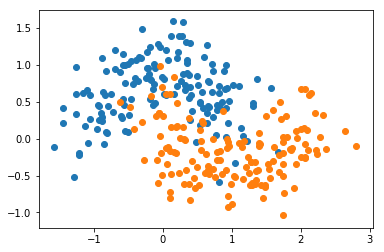

In [2]:

N=300
X, y = datasets.make_moons(N, noise=0.3)
print(X.shape, y.shape)
Y = y.reshape(N, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)
plt.scatter(X[y==0][:, 0], X[y==0][:, 1])
plt.scatter(X[y==1][:, 0], X[y==1][:, 1])
print(X[:10, :])
print(Y[:10])
plt.show()

In [3]:
num_hidden = 2
def main(X_train, X_test, Y_train, Y_test, N, batch_size=20, num_hidden=2):
    x = tf.placeholder(tf.float32, shape=[None, 2])
    t = tf.placeholder(tf.float32, shape=[None, 1])

    W = tf.Variable(tf.truncated_normal([2, num_hidden]))
    b = tf.Variable(tf.zeros([num_hidden]))
    h = tf.nn.sigmoid(tf.matmul(x, W) + b)

    V = tf.Variable(tf.truncated_normal([num_hidden, 1]))
    c = tf.Variable(tf.zeros([1]))
    y = tf.nn.sigmoid(tf.matmul(h, V) + c)

    cross_entropy = - tf.reduce_sum(t * tf.log(y) + (1-t) * tf.log(1-y))
    train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)
    correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)), t)
    
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    n_batches = N // batch_size

    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)

    for epoch in range(500):
        X_, Y_ = shuffle(X_train, Y_train)
    
        for i in range(n_batches):
            start = i * batch_size
            end = start + batch_size
        
            sess.run(train_step, feed_dict={x:X_[start:end],t:Y_[start:end]})

            accuracy_rate = accuracy.eval(session=sess, feed_dict={x: X_test, t: Y_test})
    print('accuracy: ', accuracy_rate)

In [4]:
main(X_train, X_test, Y_train, Y_test, N, num_hidden=2)

accuracy:  0.916667


In [5]:
main(X_train, X_test, Y_train, Y_test, N, num_hidden=3)

accuracy:  0.933333


### Keras

In [6]:
model = Sequential()
model.add(Dense(3, input_dim=2))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.05), metrics=['accuracy'])

In [7]:
model.fit(X_train, Y_train, epochs=500, batch_size=20)

Epoch 1/500
240/240 [==============================] - 1s 2ms/step - loss: 0.6685 - acc: 0.4917
Epoch 2/500
240/240 [==============================] - 0s 149us/step - loss: 0.6416 - acc: 0.4917
Epoch 3/500
240/240 [==============================] - 0s 158us/step - loss: 0.6232 - acc: 0.5875
Epoch 4/500
240/240 [==============================] - 0s 150us/step - loss: 0.6096 - acc: 0.7500
Epoch 5/500
240/240 [==============================] - 0s 159us/step - loss: 0.5992 - acc: 0.8250
Epoch 6/500
240/240 [==============================] - 0s 149us/step - loss: 0.5905 - acc: 0.8167

In [8]:
loss_and_metrics = model.evaluate(X_test, Y_test)

60/60 [==============================] - 0s 455us/step


In [9]:
print(loss_and_metrics)

[0.29437714815139771, 0.93333332141240433]
